In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib as mpl
mpl.use('TkAgg')
import seaborn as sns
sns.set_style('darkgrid')
from matplotlib import pyplot as plt
from scipy.integrate import odeint
mpl.rcParams['figure.figsize'] = (15,10)

from functions import *
from utils import *

\begin{equation}
C \dot{V}=I-g_{\mathrm{L}}\left(V-E_{\mathrm{L}}\right)-g_{\mathrm{Na}} m_{\infty}(V)\left(V-E_{\mathrm{Na}}\right)
\end{equation}

\begin{equation}
m_{\infty}(V)=1 /\left(1+\exp \left\{\left(V_{1 / 2}-V\right) / k\right\}\right)
\end{equation}

* E_x: reverse potential

> $[E_x] = mV$ (millivolt)

* g: conductance

> $g = 1/R \qquad [g] = mS$ (millisiemens)


* V_half: activation/inactivation half potential

> $[V_{half}] = mV$ (millivolt)

* k: activation/inactivation division coefficient

* I: injected current

> $[I] = pA$ (picoampere)

* C: capacitance

> $[C] = \mu F$ (microfarad)

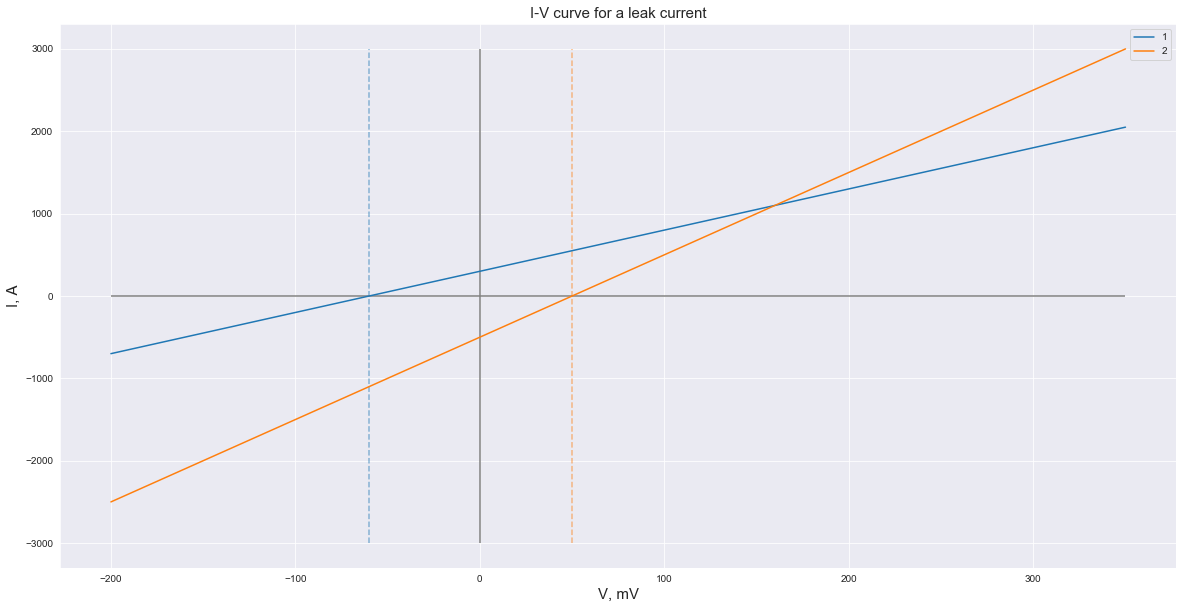

In [2]:
params1 = {'E_x': -60,
           'g': 5}

params2 = {'E_x': 50,
           'g': 10}

mpl.rcParams['figure.figsize'] = (20,10)
xlim = (-200,350)
ylim = (-3000,3000)
plot_IV_leak_current(params1, xlim, ylim, 'C0')
plot_IV_leak_current(params2, xlim, ylim, 'C1')
plt.legend(['1','2'])
plot_axis(xlim, ylim)

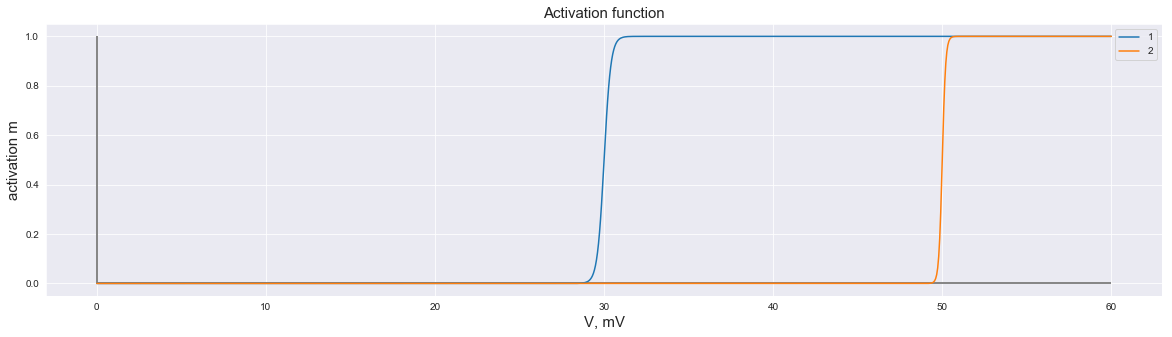

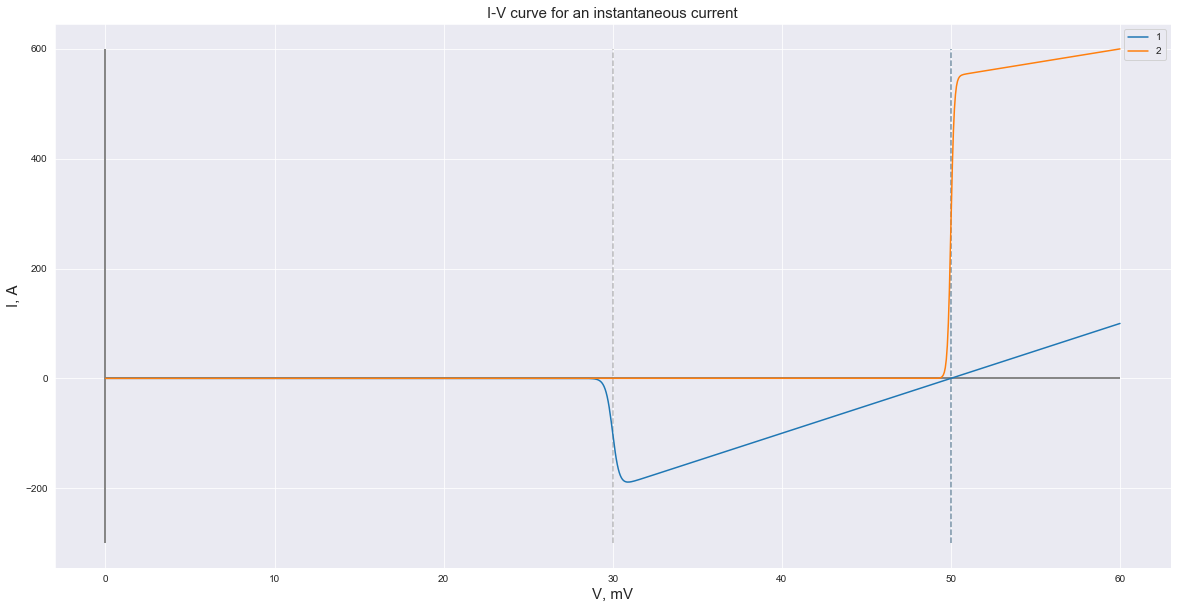

In [3]:
params3 = {'E_x': 50,
           'g': 10,
           'V_half': 30,
           'k': 1./5}
params4 = {'E_x': -60,
           'g': 5,
           'V_half': 50,
           'k': 1./10}

mpl.rcParams['figure.figsize'] = (20,5)
xlim = (0,60)
ylim = (-300,600)

plot_activation(params3, xlim, ylim, 'C0')
plot_activation(params4, xlim, ylim, 'C1')
plt.legend(['1','2'])
plt.show()

mpl.rcParams['figure.figsize'] = (20,10)
plot_IV_instantaneous_current(params3, xlim, ylim, 'C0')
plot_IV_instantaneous_current(params4, xlim, ylim, 'C1')
plt.legend(['1','2'])
plt.show()

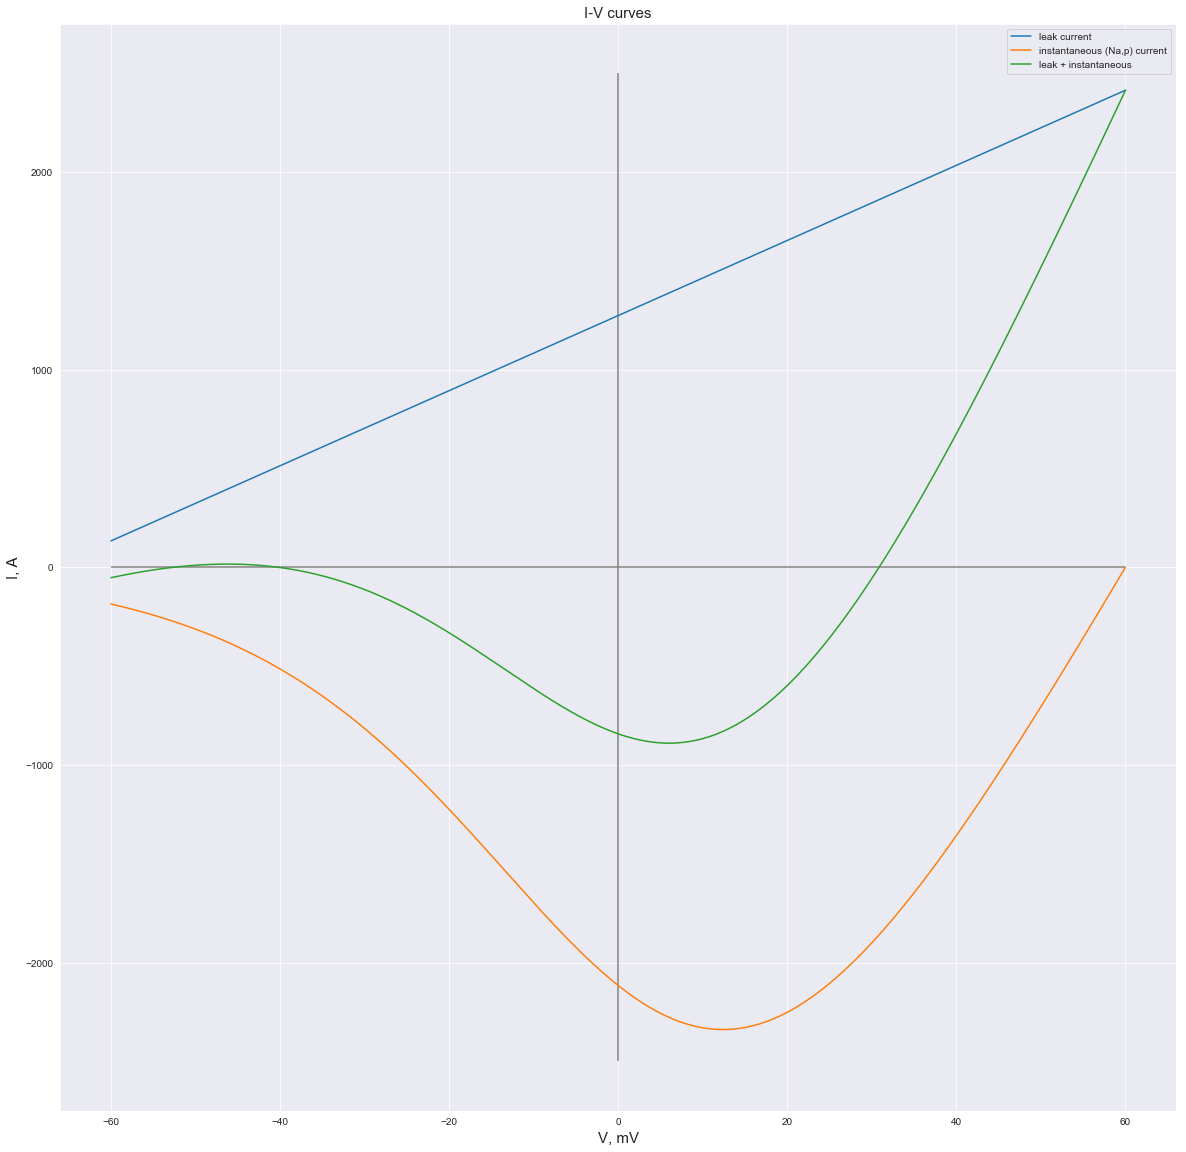

In [4]:
I = 0
C = 10

params_L = {
    'E_x': -67,
    'g': 19
}

params_Na = {
    'E_x': 60,
    'g': 74,
    'V_half': 1.5,
    'k': 16
}

I_L = leak_current(params_L)
I_fast = instantaneous_current(params_Na)
I_sum = I_L + I_fast
mpl.rcParams['figure.figsize'] = (20,20)
xlim = (-60,60)
ylim = (-2500,2500)
plot_fn(I_L, xlim, 'leak current')
plot_fn(I_fast, xlim, 'instantaneous (Na,p) current')
plot_fn(I_sum, xlim, 'leak + instantaneous')
plt.legend()
plot_axis(xlim, ylim)
plt.title('I-V curves', fontsize=15)
plt.show()

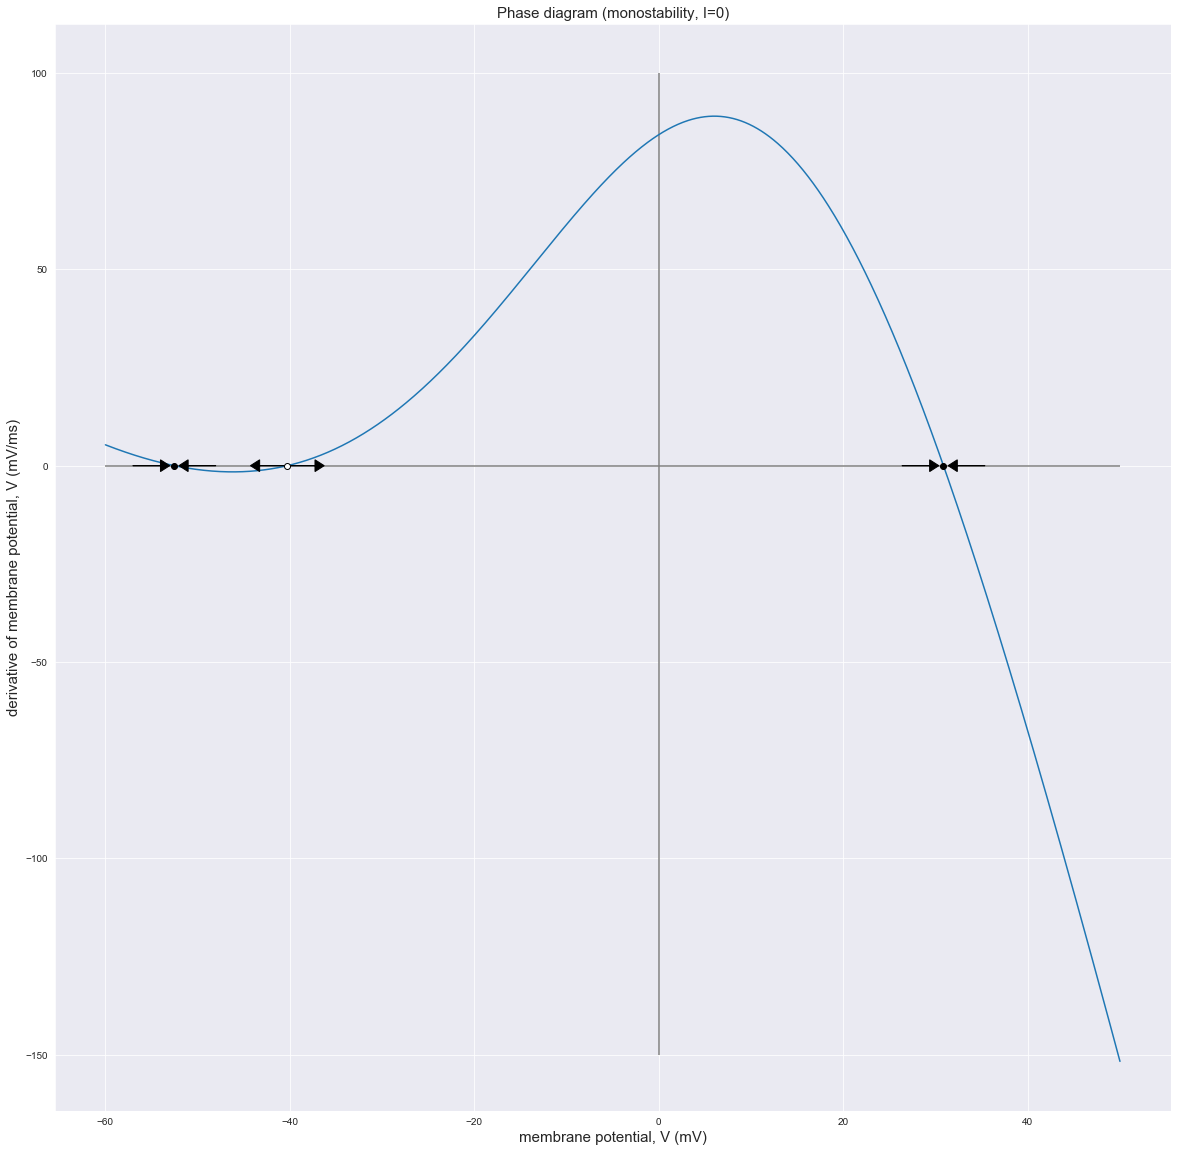

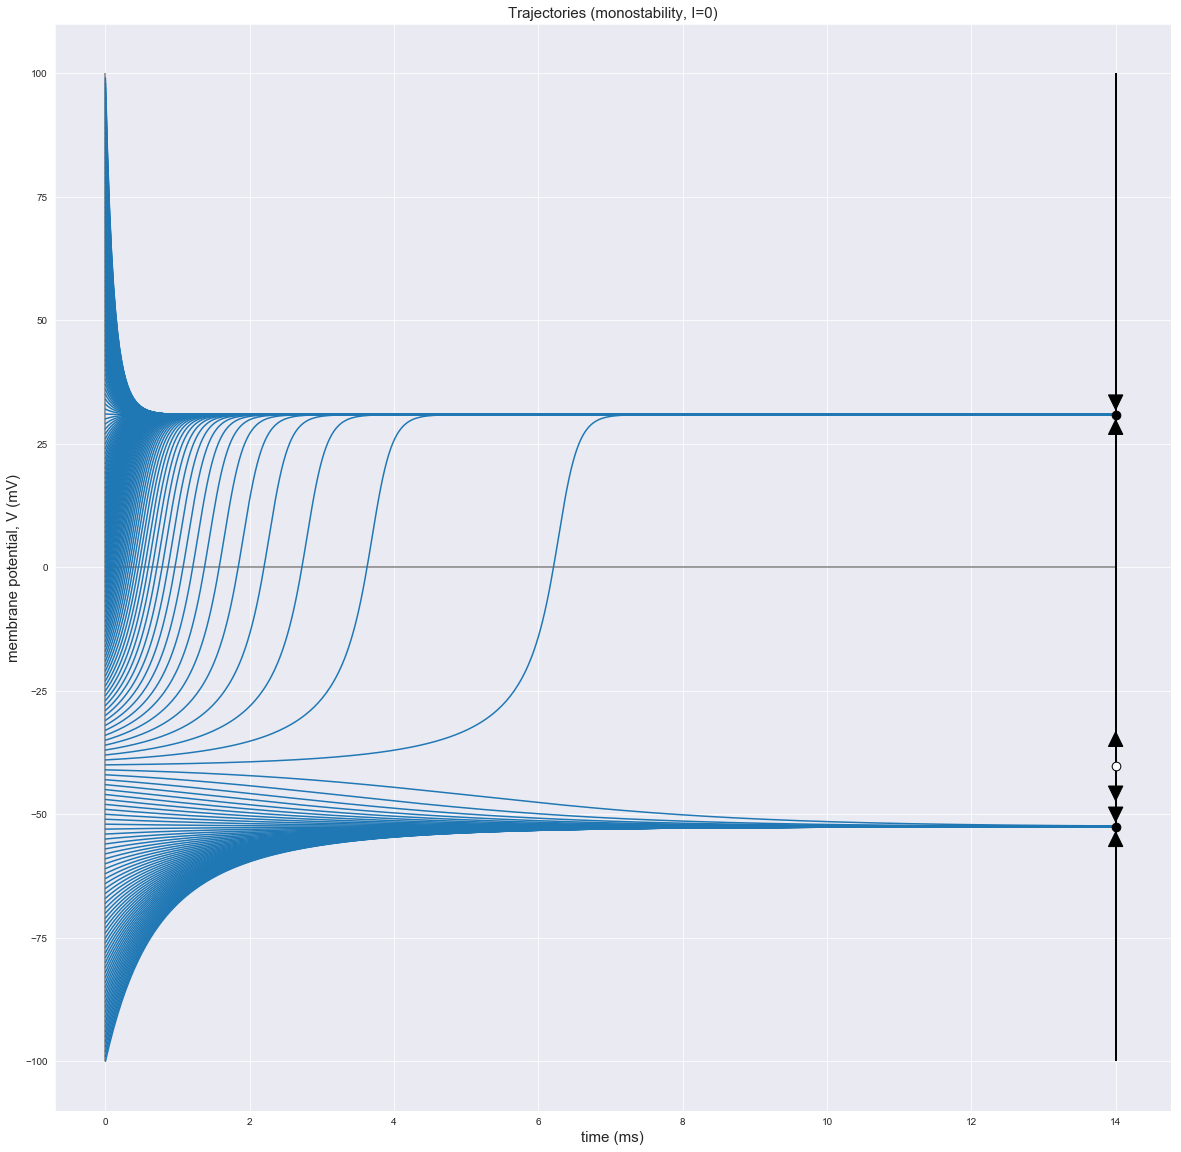

In [5]:
I = 0
ylim = (-150,100)
xlim = (-60,50)
x0 = plot_phase_diagram(params_L, params_Na, I, C, xlim, ylim, x0=[-52, -40, 31])
plt.show()
plot_trajectories(params_L, params_Na, I, C, tlim=(0,14), xlim=(-100,100), num=500, x0=[-52, -40, 31])
plt.show()

Monostability


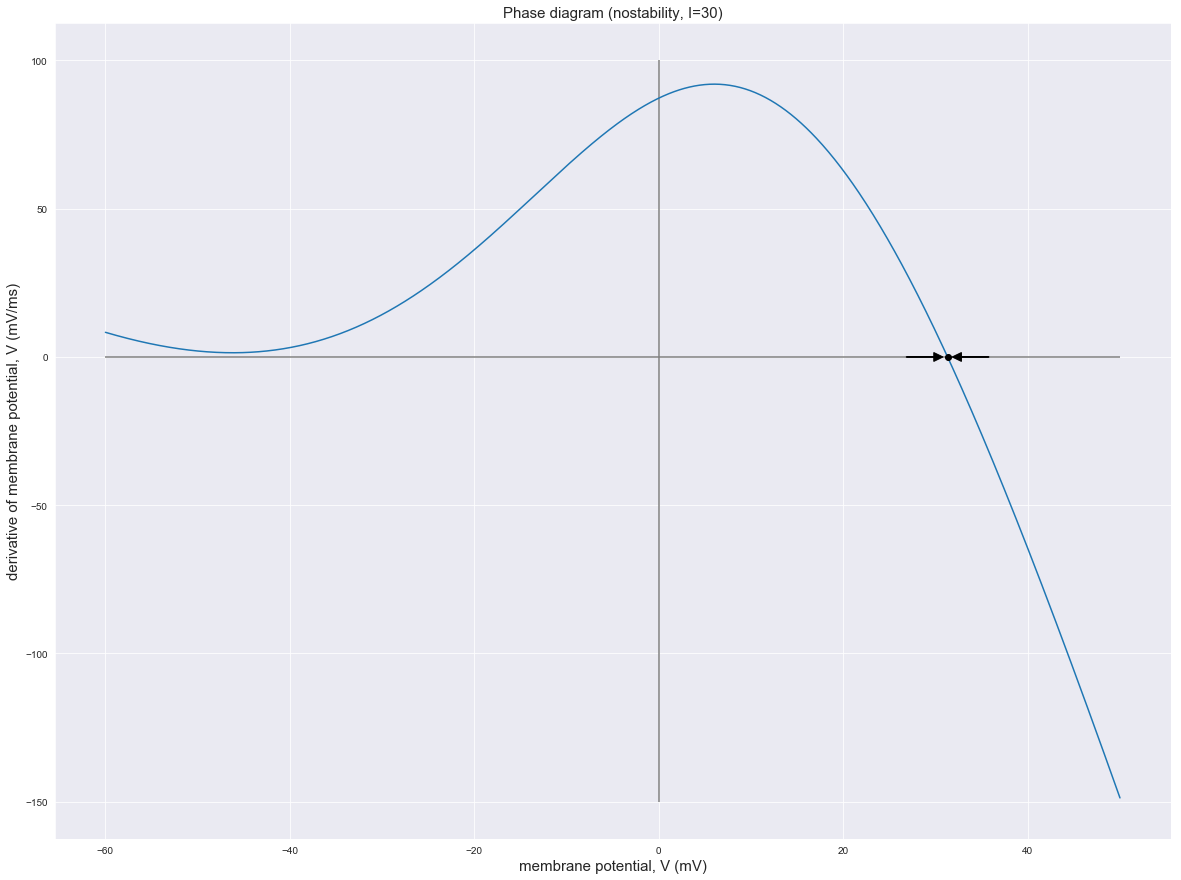

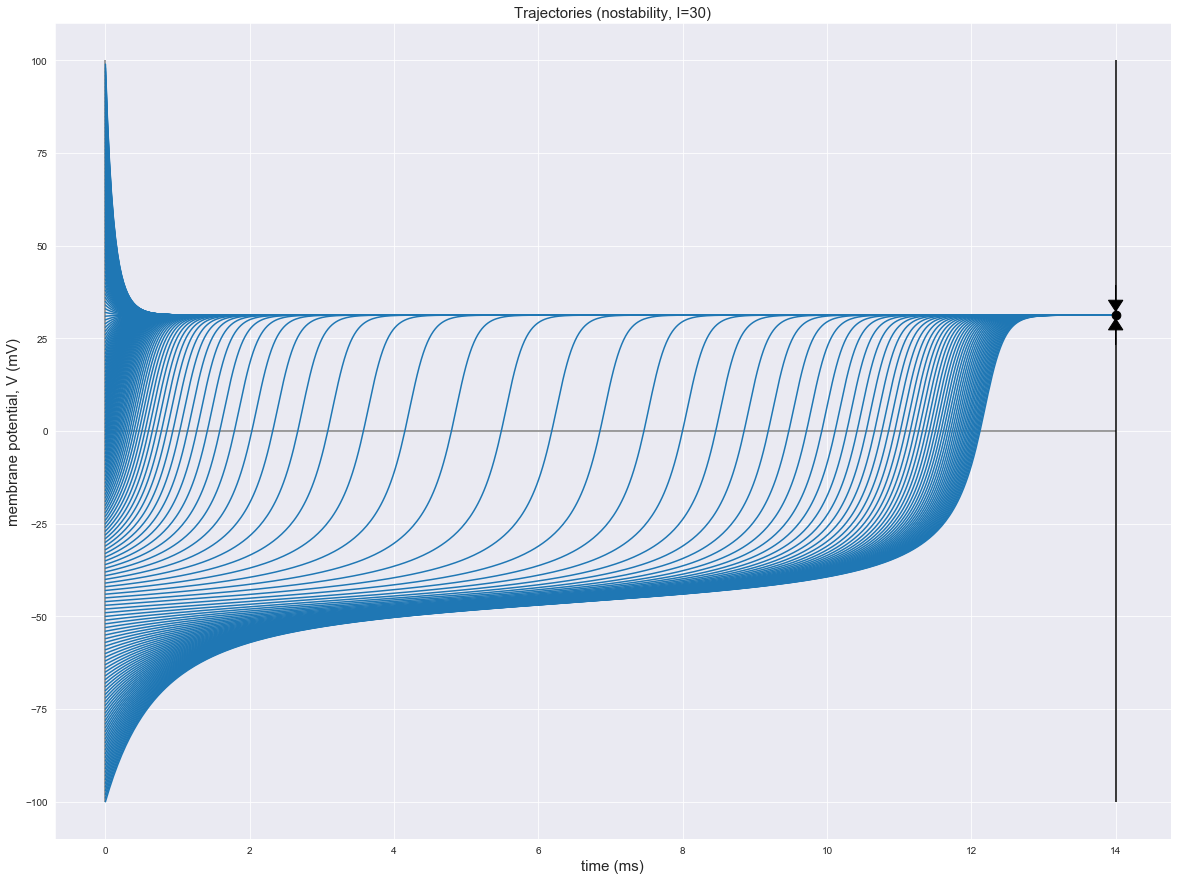

In [6]:
I = 30

mpotential_derivative = membrane_potential_derivative(params_L, params_Na, 30, C)

print('Monostability')
mpl.rcParams['figure.figsize'] = (20,15)

ylim = (-150,100)
xlim = (-60,50)
x0 = plot_phase_diagram(params_L, params_Na, I, C, xlim, ylim, x0=[31])
plt.show()

plot_trajectories(params_L, params_Na, I, C, tlim=(0,14), xlim=(-100,100), num=500, x0=[31])
plt.show()